In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import regex as re

In [ ]:
df=pd.read_csv('combine.csv')

In [9]:
df.head()




,Name,University,Course,Intake,Status,GRE,English Test,English Score,CGPA,Work Experience,Unnamed: 10
0,753255,Arizona State University,Management Information System,Fall 2018,Applied,313,TOEFL,107,62%,6 months,NaN
1,Ami0603,Arizona State University,Management Information System,Fall 2018,Applied,314,TOEFL,106,7.63 CGPA,6 months,NaN
2,Sonajan,Arizona State University,Management Information System,Fall 2018,Applied,314,ENG TEST,NA,80.68%,48 months,NaN
3,saniya264,Arizona State University,Management Information System,Fall 2018,Applied,307,TOEFL,109,62%,1 month,NaN
4,Abhiraj29,Arizona State University,Management Information System,Fall 2018,Applied,290,IELTS,7.5,7 CGPA,48 months,NaN


In [10]:
import PyPDF2 
pdfFileObj = open('LETTER_OF_RECOMMENDATION.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
print(pdfReader.numPages)
pageObj = pdfReader.getPage(0) 
    
messages=pageObj.extractText()
messages

DeprecationError: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet=WordNetLemmatizer()
# sentences = nltk.sent_tokenize(messages)
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

: 

In [ ]:
import PyPDF2 
pdfFileObj = open('SOP-for-Masters-in-Computer-science.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
print(pdfReader.numPages)
pageObj = pdfReader.getPage(0) 
    
messages=pageObj.extractText()
messages

: 

In [11]:
df['Chance of admit class']=df['Chance of Admit '].apply(lambda x:1 if x>0.80 else 0)
df.head()

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
columns = ['GRE', 'English Test', 'English Score', 'University', 'CGPA', 'Work Experience']

In [ ]:

X=df[columns]
y=df.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
df.shape


(500, 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
df.isnull().sum()

Serial No.               0
GRE Score                0
TOEFL Score              0
University Rating        0
SOP                      0
LOR                      0
CGPA                     0
Research                 0
Chance of Admit          0
Chance of admit class    0
dtype: int64

In [ ]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of admit class
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.284000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.451388
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,0.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)*100
score

97.33333333333334

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model .predict(X_test)


p=svc_model.score(X_test, y_test)*100
p

94.66666666666667

In [ ]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
sc=metrics.accuracy_score(y_test, y_pred)*100
sc

97.33333333333334

In [ ]:
int
courses=['Randomforest','svm','logistic']
values=[score,p,sc]

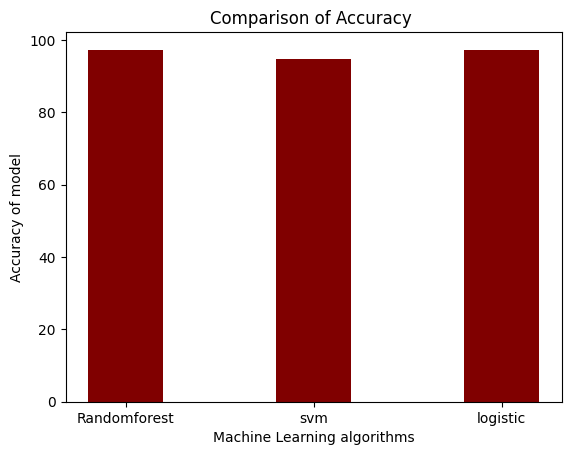

In [ ]:
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning algorithms")
plt.ylabel("Accuracy of model")
plt.title("Comparison of Accuracy ")
plt.show()

In [ ]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

svc_model.predict([[340,9, 5,7,0]])


c:\Users\yashk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'Research']

In [ ]:

X=df[columns]
y=df.iloc[:,8]

In [ ]:

from sklearn.linear_model import LinearRegression 

reg = LinearRegression()     
reg.fit(X_train, y_train)  

print("Training complete.")

Training complete.


In [ ]:
y_pred = reg.predict(X_test) 

In [ ]:
from sklearn import metrics
print("accuracy of actual and predicted r-squared : ", metrics.r2_score(y_test,y_pred))

accuracy of actual and predicted r-squared :  0.5841471734015796


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)